## Download the kaggle dataset and put it in ./data/

[Dataset](https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset/download?datasetVersionNumber=1)

In [1]:
import zipfile
import os
import shutil

zip_location = './data/archive.zip'
extract_to = './data/'

with zipfile.ZipFile(zip_location, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


os.remove("./data/archive.zip")
shutil.rmtree('./data/OriginalDataset') 


FileNotFoundError: [Errno 2] No such file or directory: './data/archive.zip'

In [4]:
import tensorflow as tf
from tensorflow import keras
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [67]:
# Importing the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory('./data/AugmentedAlzheimerDataset/', 
	labels='inferred', 
	label_mode='int', 
	image_size=(256, 256), 
	batch_size=32, 
	shuffle=True, 
	seed=42, 
	validation_split=0.2, 
	subset='training', 
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory('./data/AugmentedAlzheimerDataset/', 
	labels='inferred', 
	label_mode='int', 
	image_size=(256, 256), 
	batch_size=32, 
	shuffle=True, 
	seed=42, 
	validation_split=0.2, 
	subset='validation',
)

print("Class Names: ", train_ds.class_names)
print("Data Shape: ", train_ds.element_spec)

Found 33984 files belonging to 4 classes.
Using 27188 files for training.
Found 33984 files belonging to 4 classes.
Using 6796 files for validation.
Class Names:  ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Data Shape:  (TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


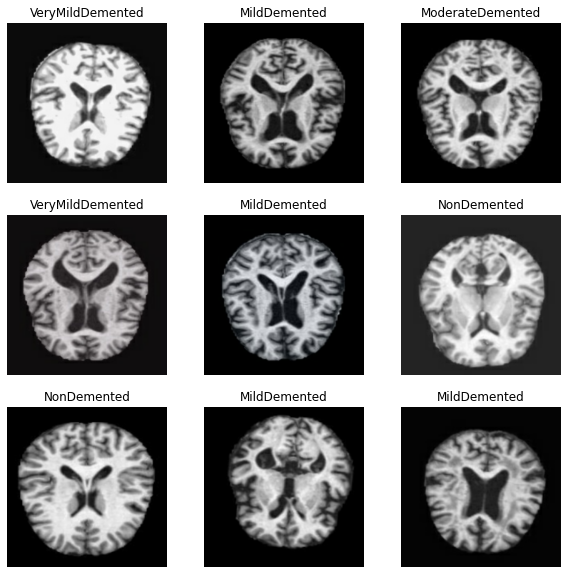

In [68]:
# Show the first 8 images and labels from the training set

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")




In [69]:
MobileNetV3Small = keras.applications.MobileNetV3Small(
	input_shape=(224, 224, 3),
	include_top=False, 
	weights='imagenet')

# Create the model

model = keras.Sequential()

for layer in MobileNetV3Small.layers[:-5]:
	layer.trainable = False

model.add(MobileNetV3Small)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(1, activation='softmax'))


In [74]:
# Compile the model

model.compile(
	optimizer=keras.optimizers.Adam(learning_rate=0.001),
	metrics=['accuracy'],
	loss='binary_crossentropy',
)

# Train the model
model.fit(
	train_ds,
	epochs=5, 
	validation_data=test_ds,
	use_multiprocessing=True,
)


Epoch 1/5
429/850 [==============>...............] - ETA: 1:01 - loss: -85.6732 - accuracy: 0.1927

KeyboardInterrupt: 

In [82]:
# Create a new model from scratch

"""model = keras.Sequential([
	keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
	keras.layers.MaxPooling2D(),
	keras.layers.Conv2D(64, 3, activation='relu'),
	keras.layers.MaxPooling2D(),
	keras.layers.Flatten(),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])"""

# Resize the test and train image data
test_ds_scaled = test_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))
train_ds_scaled = train_ds.map(lambda x, y: (tf.image.resize(x, (224, 224)), y))

model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history = model.fit(train_ds_scaled,
    validation_data=test_ds_scaled,
    epochs=10)

Epoch 1/10
  7/850 [..............................] - ETA: 55:06 - loss: 0.0000e+00 - accuracy: 0.1964

KeyboardInterrupt: 

In [ ]:
# Show the model history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()